In [26]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from math import ceil, floor,  pi, sqrt
import scipy.ndimage
from pprint import pprint

In [27]:
def similitudeMoments(img):
    m_0_0 = calc_moment(img, 0, 0)
    x_bar = calc_moment(img, 1, 0) / m_0_0
    y_bar = calc_moment(img, 0, 1) / m_0_0
    nu = []
    for i in range(4):
        for j in range(4):
            if i+j >= 2 and i+j <= 3:
                nu.append(
                    (calc_moment(img, i, j, x_bar, y_bar) /
                     m_0_0**((i+j)/2+1), f'i={i}, j={j}')
                )
    return nu

def calc_moment(img, i, j, x_bar=0, y_bar=0):
    m = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            m += (x-x_bar)**i * (y-y_bar)**j * img[x][y]
    return m

for i in range(1, 5):
    img_name = f'boxIm{i}.bmp'
    moments = similitudeMoments(rgb2gray(cv2.imread(img_name)))
    print(img_name)
    pprint(moments)

boxIm1.bmp
[(0.1646090534979424, 'i=0, j=2'),
 (0.0, 'i=0, j=3'),
 (0.0, 'i=1, j=1'),
 (0.0, 'i=1, j=2'),
 (0.04215597711532671, 'i=2, j=0'),
 (0.0, 'i=2, j=1'),
 (0.0, 'i=3, j=0')]
boxIm2.bmp
[(0.1646090534979424, 'i=0, j=2'),
 (0.0, 'i=0, j=3'),
 (0.0, 'i=1, j=1'),
 (0.0, 'i=1, j=2'),
 (0.04215597711532671, 'i=2, j=0'),
 (0.0, 'i=2, j=1'),
 (0.0, 'i=3, j=0')]
boxIm3.bmp
[(0.1641025641025641, 'i=0, j=2'),
 (0.0, 'i=0, j=3'),
 (0.0, 'i=1, j=1'),
 (0.0, 'i=1, j=2'),
 (0.04226884226884227, 'i=2, j=0'),
 (0.0, 'i=2, j=1'),
 (0.0, 'i=3, j=0')]
boxIm4.bmp
[(0.04215597711532671, 'i=0, j=2'),
 (0.0, 'i=0, j=3'),
 (0.0, 'i=1, j=1'),
 (0.0, 'i=1, j=2'),
 (0.1646090534979424, 'i=2, j=0'),
 (0.0, 'i=2, j=1'),
 (0.0, 'i=3, j=0')]


Image 1 and 4 had the same similitude moments, but they were swapped. I assume that this is because the moment is not rotation invariant, so rotating the white box flipped the moments.

Image 1 and 2 had the same moments, showing that the moments are translation invariant (the white boxes are the same size). Image 3 however, had very close but not exactly the same moments. I think this was meant to show that the moment is also scale invariant as the box got smaller. However, because the images aren't continous, the theoretical invariance falls apart due to the image resolution. 

Some of the moments were 0 for all of the images. I believe that this is may be because the region is a rectangle, so the changes only happen in one direction (edge). 

(-12.86861258420001,
 11.26275533579999,
 -10.957458346120006,
 12.325723223879994)

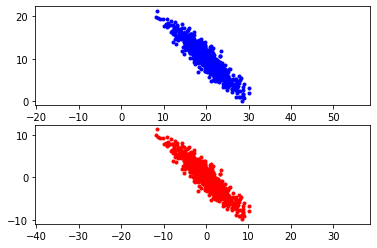

In [28]:
X = np.loadtxt('eigdata.txt')
plt.subplot(2, 1, 1)
plt.plot(X[:, 0], X[:, 1], 'b.')
plt.axis('equal')

m = np.mean(X, axis=0)
Y = X - np.full((len(X), 1), 1) * m
plt.subplot(2, 1, 2)
plt.plot(Y[:, 0], Y[:, 1], 'r.')
plt.axis('equal')

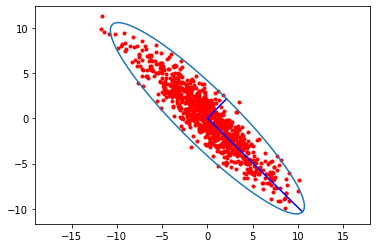

In [29]:
lam, W = np.linalg.eig(K)
#multiply unit eigenvector by 3*std dev
extended = np.copy(W)
extended[:,0] *= sqrt(lam[0]) * 3
extended[:,1] *= sqrt(lam[1]) * 3
theta = np.linspace(0, 2*np.pi, 1000)
ellipsis = extended @ [np.sin(theta), np.cos(theta)]

plt.figure()
plt.plot(Y[:, 0], Y[:, 1], 'r.', zorder=0)
plt.axis('equal')
plt.plot([0, extended[0][0]], [0, extended[1][0]], zorder=2, color='blue')
plt.plot([0, extended[0][1]], [0, extended[1][1]], zorder=2, color='blue')
plt.plot(ellipsis[0,:], ellipsis[1,:])

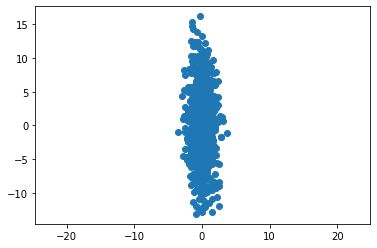

In [30]:
# mult by transpose of eigvenvectors to decorrelate
decorrelated = Y.dot(Q.transpose())
plt.figure()
plt.axis('equal')
plt.scatter(decorrelated[:, 0], decorrelated[:, 1])

(array([  5.,  15.,  53., 106., 183., 256., 191., 117.,  56.,  18.]),
 array([-16.16309306, -13.23995545, -10.31681784,  -7.39368022,
         -4.47054261,  -1.547405  ,   1.37573262,   4.29887023,
          7.22200784,  10.14514545,  13.06828307]),
 <BarContainer object of 10 artists>)

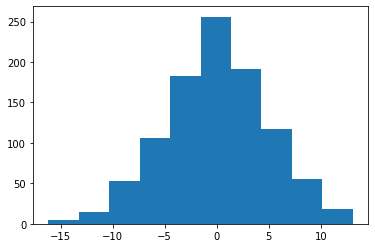

In [31]:
max_eigen = np.argmax(lam)
reduced = Y.dot(Q.transpose()[max_eigen])
plt.figure()
plt.hist(reduced)

The displayed histogram looks very close to a 1D gaussian. A quick calculation shows that the one eigenvector is able to capture ~95.9% of the variance.